Ayantika Dhar
M.Tech(CSE) IIT Jodhpur

Unzipping the dataset

In [ ]:
# Unzip the dataset
import zipfile

zip_path = '/content/drive/MyDrive/Assignment Data-20250328T164419Z-001.zip'
extract_path = '/content/drive/MyDrive/assignment_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipping completed!")


Unzipping completed!


Import necessary libraries

In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score







Data Loading and saving

In [2]:
root_path = "/content/drive/MyDrive/Assignment_Data"

image_paths = []
labels = []

for label_name in ["first_print", "second_print"]:
    folder_path = os.path.join(root_path, label_name)
    for filepath in glob.glob(os.path.join(folder_path, "*.png")):
        image_paths.append(filepath)
        labels.append(0 if label_name == "first_print" else  1)

df = pd.DataFrame({
    "image_path": image_paths,
    "label": labels
})

csv_path = "/content/drive/MyDrive/Assignment_Data/qr_code_dataset_labels.csv"
df.to_csv(csv_path, index=False)

print(f"Total images: {len(df)}")

print(f"Dataset CSV saved to: {csv_path}")
df.head()


Total images: 200
Dataset CSV saved to: /content/drive/MyDrive/Assignment_Data/qr_code_dataset_labels.csv


,image_path,label
0,/content/drive/MyDrive/Assignment_Data/first_p...,0
1,/content/drive/MyDrive/Assignment_Data/first_p...,0
2,/content/drive/MyDrive/Assignment_Data/first_p...,0
3,/content/drive/MyDrive/Assignment_Data/first_p...,0
4,/content/drive/MyDrive/Assignment_Data/first_p...,0


Visualization of samples from both the classes

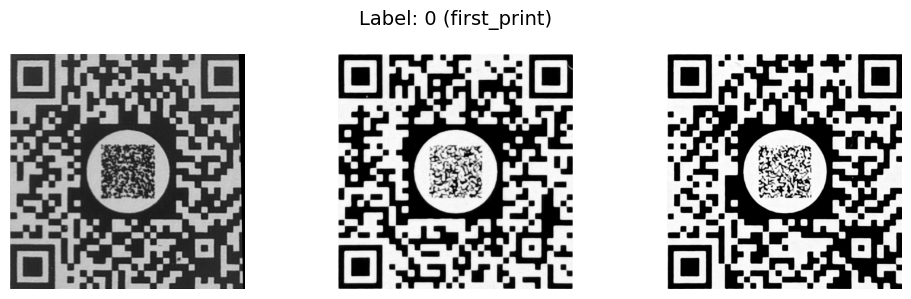

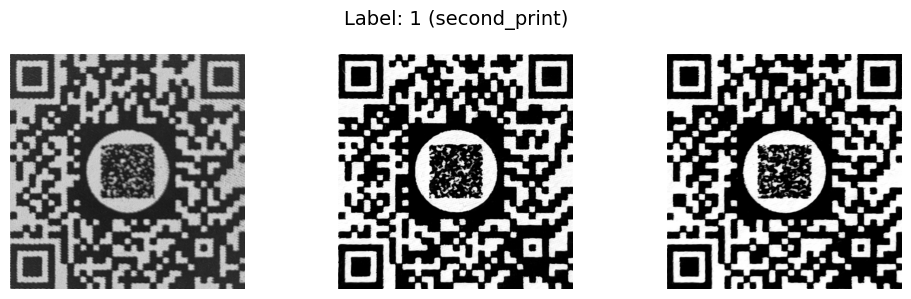

In [3]:
# Show 3 images from each class
for label in [0, 1]:
    sample_df = df[df["label"] == label].sample(3, random_state=42)

    plt.figure(figsize=(10, 3))
    plt.suptitle(f"Label: {label} ({'first_print' if label == 0 else 'second_print'})", fontsize=14)

    for i, row in enumerate(sample_df.itertuples()):
        img = cv2.imread(row.image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, 3, i+1)
        plt.imshow(img)
        plt.axis('off')

    plt.tight_layout()
    plt.show()


In [4]:
df['label'].value_counts()


,count
label,
0,100
1,100


Image statistics(Brightness and resolution)

In [5]:
image_shapes = []
mean_brightness = []

for row in df.itertuples():
    img = cv2.imread(row.image_path, cv2.IMREAD_GRAYSCALE)
    image_shapes.append(img.shape)
    mean_brightness.append(np.mean(img))

df['resolution'] = image_shapes
df['brightness'] = mean_brightness

print("\n📐 Resolution distribution:")
print(pd.Series(image_shapes).value_counts().head())

print("\n Brightness summary by class:")
print(df.groupby("label")['brightness'].describe())



📐 Resolution distribution:
(784, 784)    5
(820, 820)    4
(815, 815)    4
(716, 716)    4
(899, 899)    4
Name: count, dtype: int64

 Brightness summary by class:
       count        mean        std        min         25%         50%  \
label                                                                    
0      100.0  121.614789  13.444310  97.930936  108.200246  128.782967   
1      100.0  105.162473   7.097267  87.411893  101.137706  106.068688   

              75%         max  
label                          
0      132.711928  137.937328  
1      110.039164  129.985738  


Resizing the dataset

In [6]:
# Resize target
target_size = (224, 224)
resized_images = []
resized_labels = []

for row in tqdm(df.itertuples(), total=len(df)):
    img = cv2.imread(row.image_path, cv2.IMREAD_GRAYSCALE)

    img_resized = cv2.resize(img, target_size)

    img_normalized = img_resized / 255.0


    resized_images.append(img_normalized)
    resized_labels.append(row.label)


X = np.array(resized_images).reshape(-1, 224, 224, 1)
y = np.array(resized_labels)

print(f"\n Resized X shape: {X.shape}")
print(f" Labels y shape: {y.shape}")

np.save("/content/drive/MyDrive/Assignment_Data/X_resized.npy", X)
np.save("/content/drive/MyDrive/Assignment_Data/y_labels.npy", y)
print(" Data saved as .npy files")



100%|██████████| 200/200 [00:05<00:00, 39.35it/s]



 Resized X shape: (200, 224, 224, 1)
 Labels y shape: (200,)
 Data saved as .npy files


Model implementation

Model 1: Machine Learning Model(Logistic Regression)

In [7]:
# Feature: Brightness only
X_feat = df[['brightness']]
y_feat = df['label']
X_train, X_test, y_train, y_test = train_test_split(X_feat, y_feat, stratify=y_feat, random_state=42, test_size=0.2)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\n Classification Report:\n")
print(classification_report(y_test, y_pred))

print("\n Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

acc = accuracy_score(y_test, y_pred)
print(f"\n Accuracy: {acc:.4f}")







 Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        20
           1       0.69      0.90      0.78        20

    accuracy                           0.75        40
   macro avg       0.77      0.75      0.74        40
weighted avg       0.77      0.75      0.74        40


 Confusion Matrix:

[[12  8]
 [ 2 18]]

 Accuracy: 0.7500


Meaningful plots

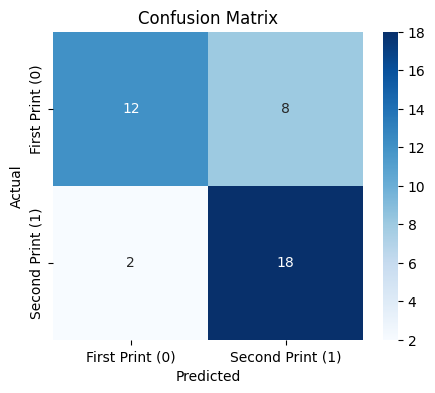

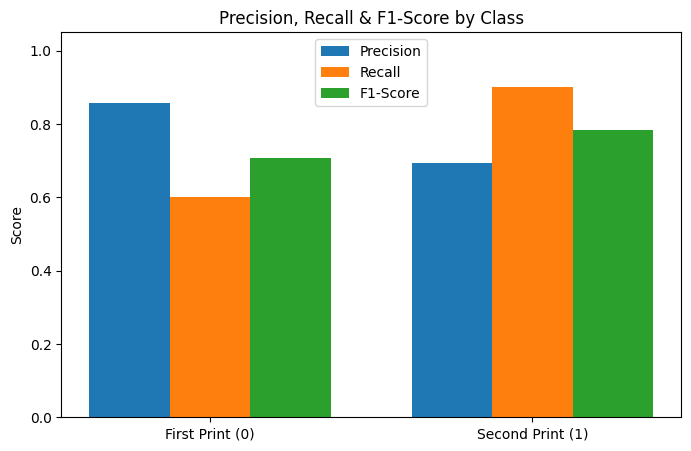

In [9]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['First Print (0)', 'Second Print (1)'],
            yticklabels=['First Print (0)', 'Second Print (1)'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

labels = ['First Print (0)', 'Second Print (1)']
x = range(len(labels))

plt.figure(figsize=(8, 5))
plt.bar(x, precision, width=0.25, label='Precision')
plt.bar([i + 0.25 for i in x], recall, width=0.25, label='Recall')
plt.bar([i + 0.50 for i in x], f1, width=0.25, label='F1-Score')
plt.xticks([i + 0.25 for i in x], labels)
plt.ylabel("Score")
plt.title("Precision, Recall & F1-Score by Class")
plt.ylim(0, 1.05)
plt.legend()
plt.show()



Model 2: Deep Learning Model (CNN)

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

model = models.Sequential([
    layers.Input(shape=(224, 224, 1)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # binary output
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=10,
                    batch_size=16)

model.save("/content/drive/MyDrive/Assignment_Data/cnn_model_qr_auth.h5")
print("✅ CNN model saved")


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.5407 - loss: 0.7916 - val_accuracy: 0.8500 - val_loss: 0.5468
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.7971 - loss: 0.4985 - val_accuracy: 0.7500 - val_loss: 0.4626
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.8893 - loss: 0.2678 - val_accuracy: 1.0000 - val_loss: 0.1626
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9925 - loss: 0.1076 - val_accuracy: 0.9750 - val_loss: 0.0983
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9744 - loss: 0.0941 - val_accuracy: 0.9750 - val_loss: 0.0779
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9932 - loss: 0.0505 - val_accuracy: 0.9750 - val_loss: 0.0540
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 1.0000 - loss: 0.0203 - val_accuracy: 1.0000 - val_loss: 0.0296
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9946 - loss: 0.0257 - val_accuracy: 1.0000 - val_loss:

✅ CNN model saved


In [11]:

y_pred_prob = model.predict(X_val)
y_pred = (y_pred_prob > 0.5).astype("int32").flatten()

print("Classification Report:\n")
print(classification_report(y_val, y_pred))

cm = confusion_matrix(y_val, y_pred)
print("\n Confusion Matrix:\n", cm)

acc = accuracy_score(y_val, y_pred)
print(f"\n Accuracy: {acc:.4f}")



2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step
Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.95      1.00      0.98        20

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40


 Confusion Matrix:
 [[19  1]
 [ 0 20]]

 Accuracy: 0.9750


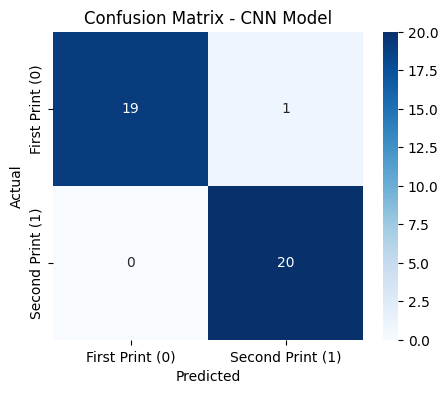

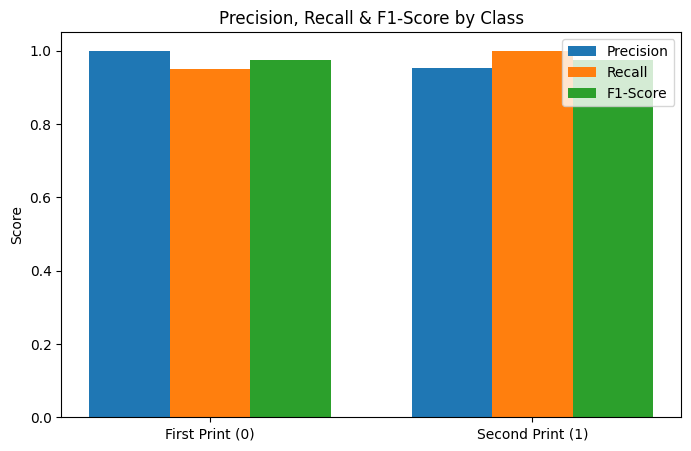

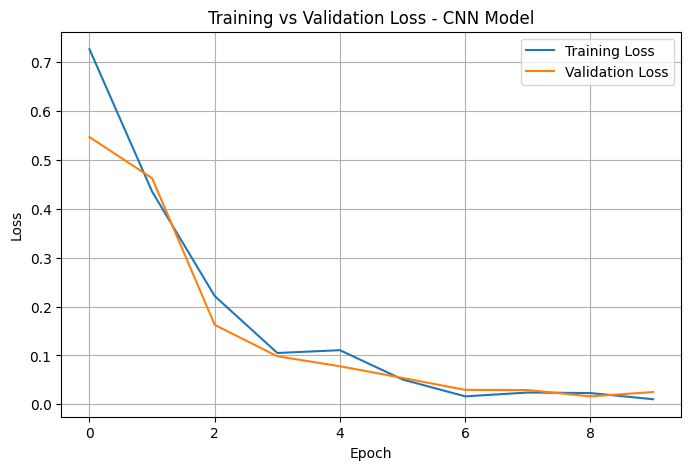

In [12]:
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['First Print (0)', 'Second Print (1)'],
            yticklabels=['First Print (0)', 'Second Print (1)'])
plt.title("Confusion Matrix - CNN Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

precision = precision_score(y_val, y_pred, average=None)
recall = recall_score(y_val, y_pred, average=None)
f1 = f1_score(y_val, y_pred, average=None)

labels = ['First Print (0)', 'Second Print (1)']
x = range(len(labels))

plt.figure(figsize=(8, 5))
plt.bar(x, precision, width=0.25, label='Precision')
plt.bar([i + 0.25 for i in x], recall, width=0.25, label='Recall')
plt.bar([i + 0.50 for i in x], f1, width=0.25, label='F1-Score')
plt.xticks([i + 0.25 for i in x], labels)
plt.ylabel("Score")
plt.title("Precision, Recall & F1-Score by Class")
plt.ylim(0, 1.05)
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss - CNN Model')
plt.legend()
plt.grid(True)
plt.show()


Data Augmentation and early stopping on the deep learning model for reducing overfitting

In [13]:
# Create ImageDataGenerator with augmentation
'''datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    brightness_range=[0.8, 1.2],
    width_shift_range=0.05,
    height_shift_range=0.05
)'''


datagen = ImageDataGenerator(
    rotation_range=5,
    zoom_range=0.05,
    brightness_range=[0.9, 1.1],
    width_shift_range=0.02,
    height_shift_range=0.02
)

datagen.fit(X_train)

# Define EarlyStopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True) # Define early_stop

history_aug = model.fit(datagen.flow(X_train, y_train, batch_size=16),
                        validation_data=(X_val, y_val),
                        epochs=20,
                        callbacks=[early_stop])

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.4073 - loss: 1.1648 - val_accuracy: 0.9500 - val_loss: 0.1079
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.4371 - loss: 0.7056 - val_accuracy: 0.9500 - val_loss: 0.1438
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.5013 - loss: 0.6782 - val_accuracy: 0.9250 - val_loss: 0.2083
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.5320 - loss: 0.6810 - val_accuracy: 0.9250 - val_loss: 0.1667


Meaningful Plots

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step
 Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.95      0.95      0.95        20

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40


 Confusion Matrix:
 [[19  1]
 [ 1 19]]

 Accuracy: 0.9500


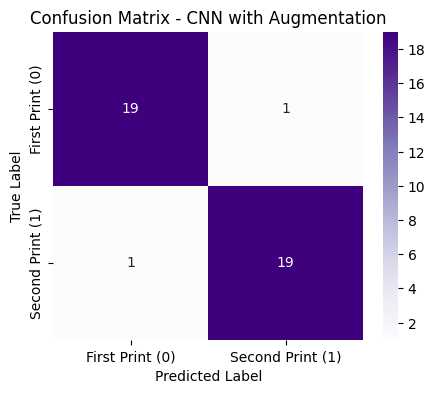

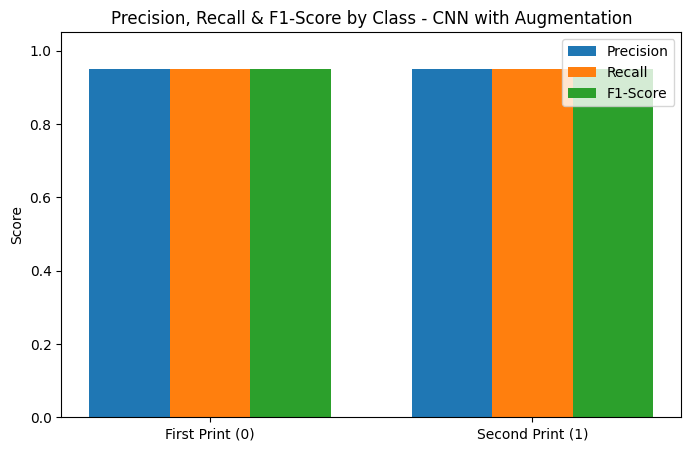

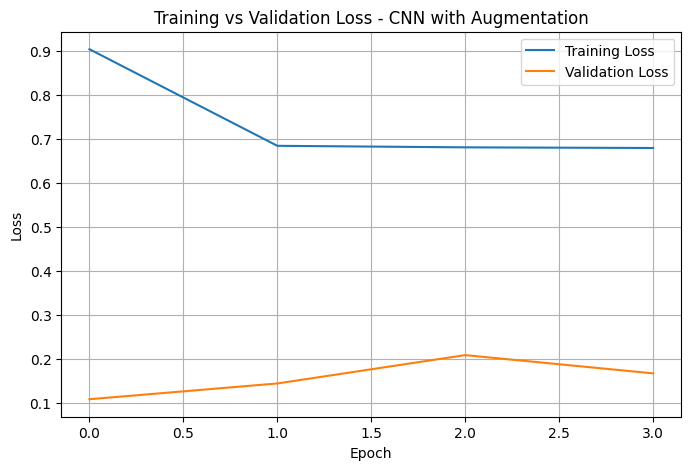

In [14]:
y_pred_prob = model.predict(X_val)
y_pred = (y_pred_prob > 0.5).astype("int32").flatten()

print(" Classification Report:\n")
print(classification_report(y_val, y_pred))

cm = confusion_matrix(y_val, y_pred)
acc = accuracy_score(y_val, y_pred)

print("\n Confusion Matrix:\n", cm)
print(f"\n Accuracy: {acc:.4f}")

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['First Print (0)', 'Second Print (1)'],
            yticklabels=['First Print (0)', 'Second Print (1)'])
plt.title("Confusion Matrix - CNN with Augmentation")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

precision = precision_score(y_val, y_pred, average=None)
recall = recall_score(y_val, y_pred, average=None)
f1 = f1_score(y_val, y_pred, average=None)

labels = ['First Print (0)', 'Second Print (1)']
x = range(len(labels))

plt.figure(figsize=(8, 5))
plt.bar(x, precision, width=0.25, label='Precision')
plt.bar([i + 0.25 for i in x], recall, width=0.25, label='Recall')
plt.bar([i + 0.50 for i in x], f1, width=0.25, label='F1-Score')
plt.xticks([i + 0.25 for i in x], labels)
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.title("Precision, Recall & F1-Score by Class - CNN with Augmentation")
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history_aug.history['loss'], label='Training Loss')
plt.plot(history_aug.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss - CNN with Augmentation')
plt.legend()
plt.grid(True)
plt.show()



Transfer learning for further accuracy

Tranfer Learning to see if model improves and overfitting decreases

In [15]:
# Convert grayscale (1-channel) to RGB (3-channel)
X_rgb = np.repeat(X, 3, axis=-1)  # shape: (200, 224, 224, 3)

X_train_rgb, X_val_rgb, y_train, y_val = train_test_split(X_rgb, y, test_size=0.2, stratify=y, random_state=42)

# Load MobileNetV2 base (without top)
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

#Add custom classification head
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#Train with early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_tl = model.fit(X_train_rgb, y_train,
                       validation_data=(X_val_rgb, y_val),
                       epochs=20,
                       batch_size=16,
                       callbacks=[early_stop])


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.7920 - loss: 0.4623 - val_accuracy: 0.9750 - val_loss: 0.1079
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 628ms/step - accuracy: 0.9845 - loss: 0.0962 - val_accuracy: 1.0000 - val_loss: 0.0399
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 773ms/step - accuracy: 1.0000 - loss: 0.0272 - val_accuracy: 1.0000 - val_loss: 0.0230
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 768ms/step - accuracy: 1.0000 - loss: 0.0126 - val_accuracy: 1.0000 - val_loss: 0.0183
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 625ms/step - accuracy: 1.0000 - loss: 0.0110 - val_accuracy: 1.0000 - val_loss: 0.0170
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 858ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 1.0000 - val_loss: 0.0133
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 812ms/step - accuracy: 1.0000 - loss: 0.0075 - val_accuracy: 1.0000 - val_loss: 0.0089
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 621ms/step - accuracy: 1.0000 - loss: 0.0058 - val_accuracy:

Meaningful Plots

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
 Accuracy: 1.0000
 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



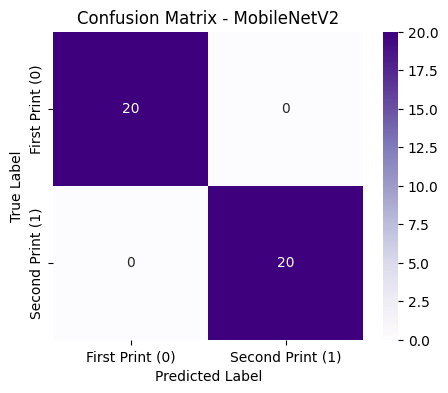

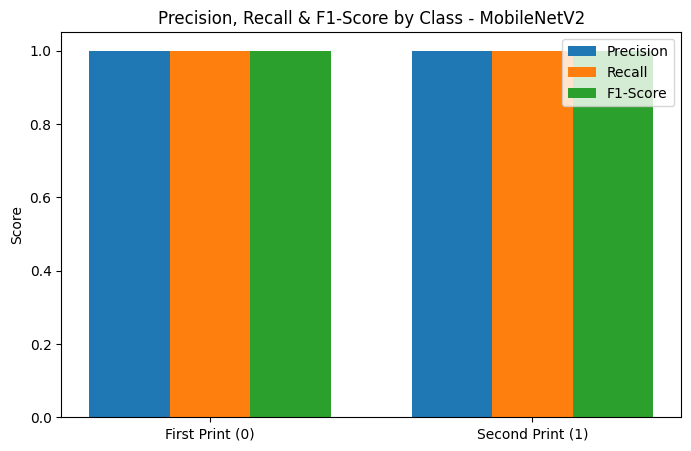

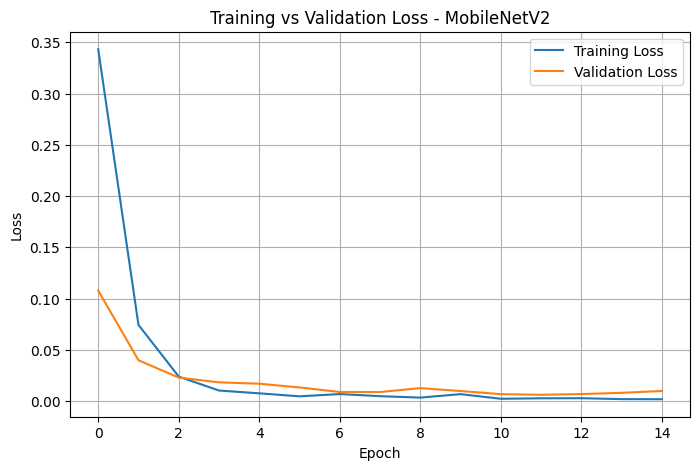

In [16]:
y_pred_prob = model.predict(X_val_rgb)
y_pred = (y_pred_prob > 0.5).astype("int32").flatten()

acc = accuracy_score(y_val, y_pred)
print(f" Accuracy: {acc:.4f}")

print(" Classification Report:\n")
print(classification_report(y_val, y_pred))

cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['First Print (0)', 'Second Print (1)'],
            yticklabels=['First Print (0)', 'Second Print (1)'])
plt.title("Confusion Matrix - MobileNetV2")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

precision = precision_score(y_val, y_pred, average=None)
recall = recall_score(y_val, y_pred, average=None)
f1 = f1_score(y_val, y_pred, average=None)

labels = ['First Print (0)', 'Second Print (1)']
x = range(len(labels))

plt.figure(figsize=(8, 5))
plt.bar(x, precision, width=0.25, label='Precision')
plt.bar([i + 0.25 for i in x], recall, width=0.25, label='Recall')
plt.bar([i + 0.50 for i in x], f1, width=0.25, label='F1-Score')
plt.xticks([i + 0.25 for i in x], labels)
plt.ylabel("Score")
plt.title("Precision, Recall & F1-Score by Class - MobileNetV2")
plt.ylim(0, 1.05)
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history_tl.history['loss'], label='Training Loss')
plt.plot(history_tl.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss - MobileNetV2')
plt.legend()
plt.grid(True)
plt.show()
